# **PART03. 케라스(Keras)**

##**01.딥러닝 준비**

케라스는 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어줌.

###1-1. 주요 용어
1. 하이퍼파라미터 : 딥러닝에서의 하이퍼파라미터는 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값을 뜻함. 학습속도나 반복 훈련 횟수 등..

2. 과소적합 VS 과대적합

    - 모델이 충분히 학습되지 않은 경우에는 예측 성능이 떨어짐. => 과소적합
    - 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태. => 과대적합
3. 에포크 : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프.

4. 손실함수(loss function)
: 예측 값과 정답 값의 차이 또는 오차

    지도학습의 분류문제
     - 이진분류 : binary_crossentropy 손실함수 사용. 출력층 활성화함수가 sigmoid.
     - 다중분류 : categorical_crossentropy 손실함수 사용. 출력층 활성화함수로 softmax.

In [ ]:
import tensorflow as tf

tf.keras.losses.BinaryCrossentropy()
tf.keras.losses.binary_crossentropy

<function keras.src.losses.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

5. 경사하강법 (gradient descent)
 : 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법.
 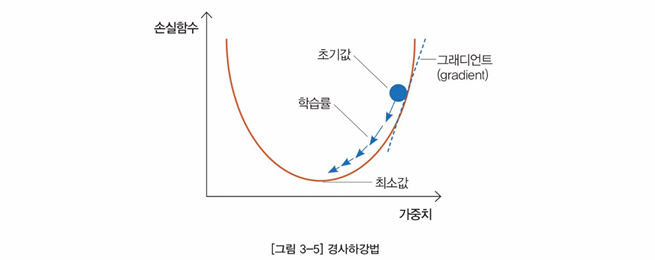

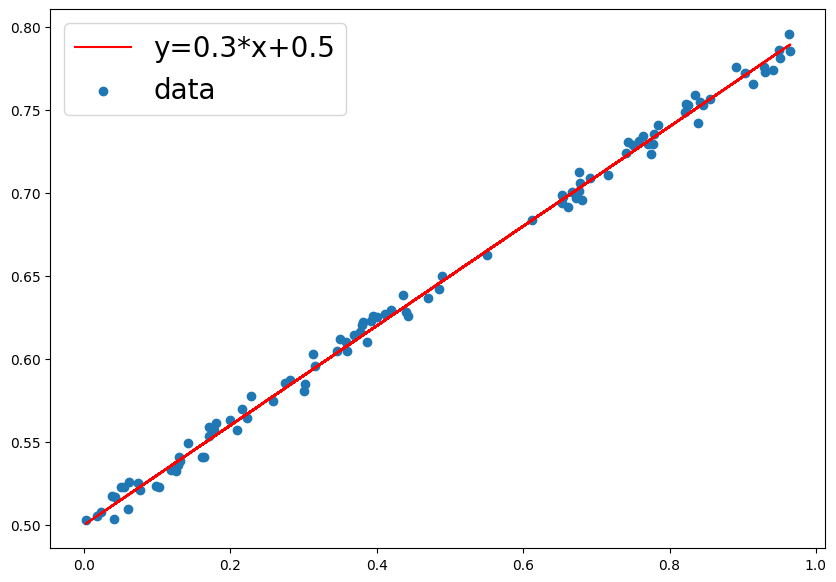

w:0.3,b:0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w*x +b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y+noise
    plt.figure(figsize=(10,7))
    plt.plot(x,y,color='r', label=f'y={w}*x+{b}')
    plt.scatter(x,yy,label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w:{w},b:{b}')
    return x,yy
x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.30252, b = 0.65252 error = 7.91592
 5 w = 0.25130, b = 0.52634 error = 0.01332
10 w = 0.25893, b = 0.52125 error = 0.00927
15 w = 0.26569, b = 0.51784 error = 0.00684
20 w = 0.27130, b = 0.51502 error = 0.00517
------------------------------------------------------------
21 w = 0.3, b = 0.5 error = 0.00490


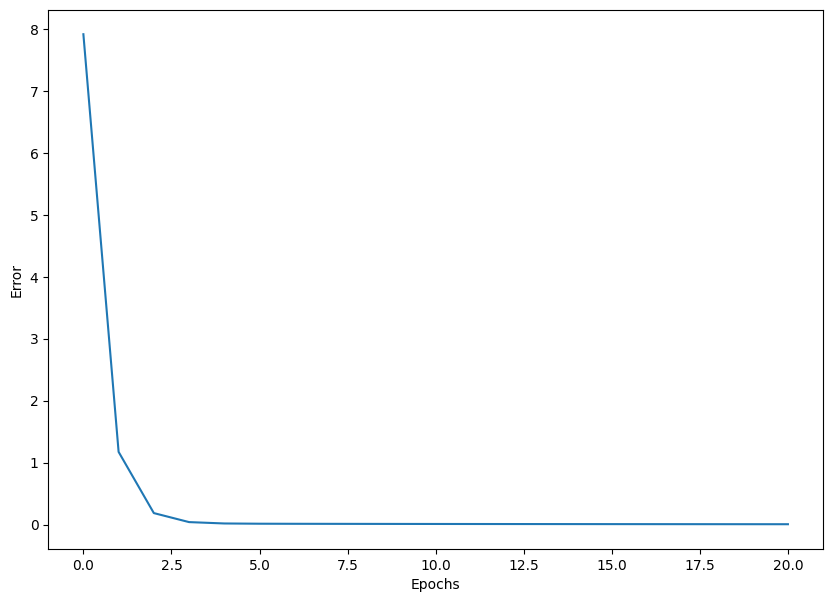

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

###1-2. 딥러닝 프로세스
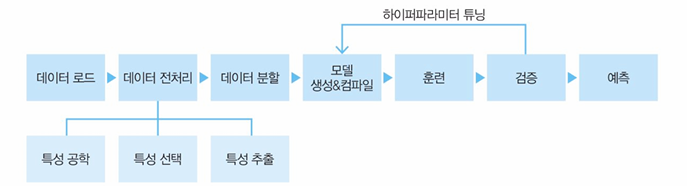

1. 데이터 전처리 : 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계.
2. 모델 생성 : 모델의 구조를 정의하고 생성하는 단계.
3. 모델 컴파일 : 딥러닝 모델의 구조를 정의하고 생성한 뒤에는, 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의.
4. 모델 훈련
5. 모델 검증 : 훈련이 완료된 모델을 검증하는 단계. 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측값을 정답과 비교하여 평가지표를 계산.
6. 모델 예측

##**02. 단순 신경망 훈련**
### 2-1. 선형회귀
회귀분석이란 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법.

단순선형회귀 모형은 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있다.

### 2-2. 뉴런(neuron)
### 2-3. Dense 레이어
Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어.

각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층이라고 부름.
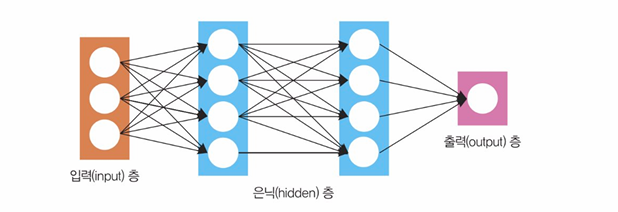

In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10)
tf.keras.layers.Dense(10,activation='relu')

<Dense name=dense_1, built=False>

###2-4. 데이터셋 만들기

In [ ]:
x = np.arange(1,6)
y = 3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


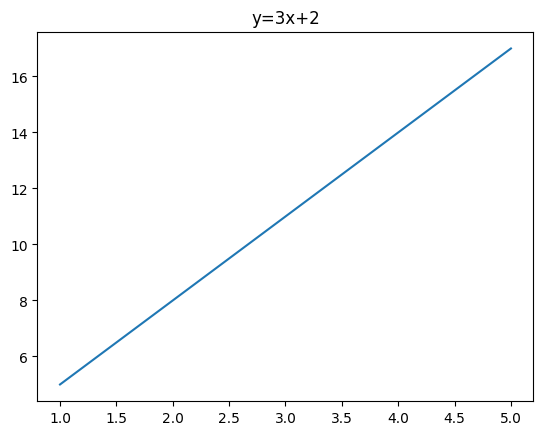

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

###2-5. Sequential API

Sequential API 방식은 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식.

입력 레이어부터 출력 레이어까지 순서를 가짐.

1. 모델구조

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2. 입력 데이터 형태

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=[4]),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. 단순선형회귀 모델 정의

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1,input_shape=[1])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###2-6. 모델 요약

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

###2-7. 컴파일

컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵팀이저, 손실함수, 평가지표등을 정의.

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics = ['mean_squared_error','mean_absolute_error'])

In [ ]:
model.compile(optimizer = 'sgd', loss='mse', metrics=['mse','mae'])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.005),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()
                         ])

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

###2-8. 훈련

생성한 모델 인스턴스에 fit() 메소드를 적용하면, 데이터를 입력하여 모델을 훈련할 수 있다.

In [ ]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - loss: 196.0406 - mae: 13.0049
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 114.3052 - mae: 9.9637
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 66.6734 - mae: 7.6420
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 38.9155 - mae: 5.8696
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 22.7392 - mae: 4.5164


In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history = model.fit(x,y,epochs=1200)

Epoch 1/1200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - loss: 148.6031 - mae: 11.3632
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 86.6817 - mae: 8.7160
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 50.5963 - mae: 6.6951
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 29.5670 - mae: 5.1522
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 17.3116 - mae: 3.9742
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.1692 - mae: 3.0749
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.0065 - mae: 2.3882
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.5801 - mae: 1.8638
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.1655 - mae: 1.4634
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.3407 - mae: 1.1576
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.8595 - mae: 0.9240
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5785 - mae: 0.7456
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

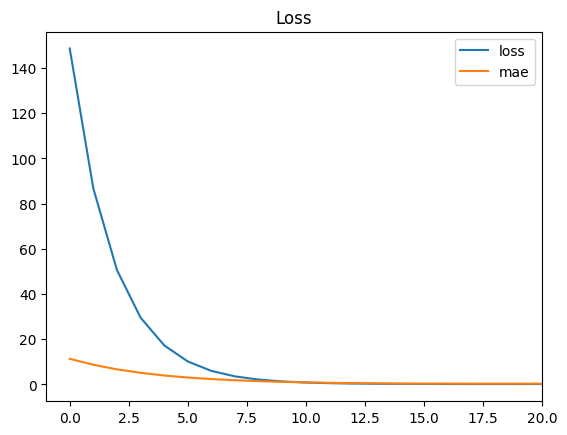

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

###2-9. 검증

모델 인스턴스의 evaluate() 메소드로 모델의 성능을 검증.

In [23]:
model.evaluate(x,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 5.9747e-05 - mae: 0.0066


[5.974659143248573e-05, 0.006634426303207874]

###2-10. 예측

In [26]:
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[32.032066]], dtype=float32)

##**03. 심층 신경망으로 이미지 분류**

###3-1. 케라스 내장 데이터셋 로드

In [27]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [30]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [31]:
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


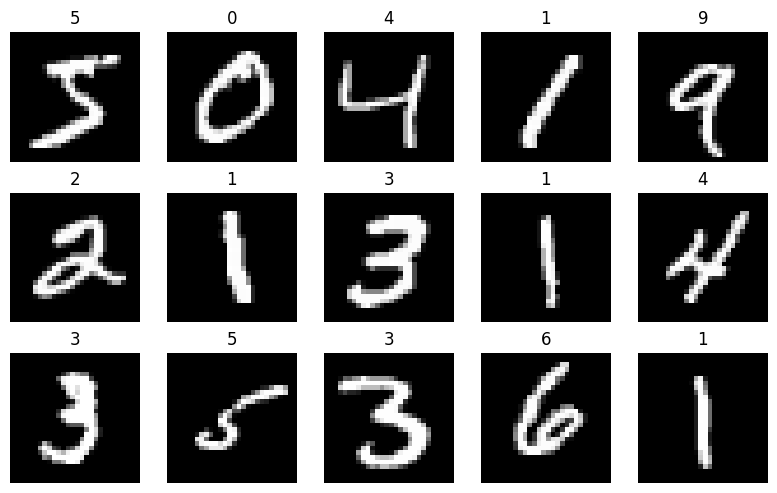

In [32]:
#데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]

  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

###3-2. 데이터 전처리

In [33]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [34]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최대값 : 255
정규화 후] 최소값 : 0.0, 최대값 : 1.0


In [35]:
x_test = x_test / x_test.max()

In [37]:
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

###3-3. Flatten 레이어


In [38]:
print(f'변경 전 shape : {x_train.shape}')
print(f'1D으로 shape 변경 후 : {x_train.reshape(60000, -1).shape}')

변경 전 shape : (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


In [39]:
print(f'변경 전 shape : {x_train.shape}')
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flatten 적용 후 : (60000, 784)


### 3-4. 활성화함수
: 입력을 비선형 출력으로 변환해주는 함수.
자주 사용되는 활성화 함수로는 시그모이드, 하이퍼볼릭 탄젠트, ReLU, ..등

In [40]:
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_13, built=False>

In [41]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

###3-5. 입력과 출력

In [42]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = 'softmax')

<Dense name=dense_20, built=False>

###3-6. 손실함수

In [44]:
model.compile(loss='binary-crossentropy')

In [45]:
model.compile(loss='categorical_crossentropy')
model.compile(loss='sparse_categorical_crossentropy')

### 3-7. 옵티마이저
 옵티마이저는 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망이 속성을 변경하는 데 사용되는 최적화 방법.

In [46]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

model.compile(optimizer='adam')

###3-8. 평가지표

In [47]:
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9. 훈련

In [49]:
model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8703 - loss: 0.4237 - val_accuracy: 0.9649 - val_loss: 0.1122
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9713 - loss: 0.0950 - val_accuracy: 0.9755 - val_loss: 0.0850
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9819 - loss: 0.0607 - val_accuracy: 0.9768 - val_loss: 0.0773
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9858 - loss: 0.0457 - val_accuracy: 0.9763 - val_loss: 0.0745
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9889 - loss: 0.0357 - val_accuracy: 0.9778 - val_loss: 0.0815
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9916 - loss: 0.0263 - val_accuracy: 0.9779 - val_loss: 0.0772
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9778 - val_loss: 0.0827
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9938 - loss: 

### 3-10. 평가

In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9764 - loss: 0.0966
검증 셋 정확도: 0.9797000288963318


### 3-11. 예측

In [51]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [52]:
predictions[0]

array([2.1016389e-09, 3.7245920e-07, 4.9327911e-09, 7.8334516e-08,
       7.6644639e-08, 6.8018258e-11, 2.8518323e-13, 9.9999851e-01,
       1.2552206e-10, 8.5012380e-07], dtype=float32)

In [53]:
import numpy as np
print(np.argmax(predictions[0]))
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


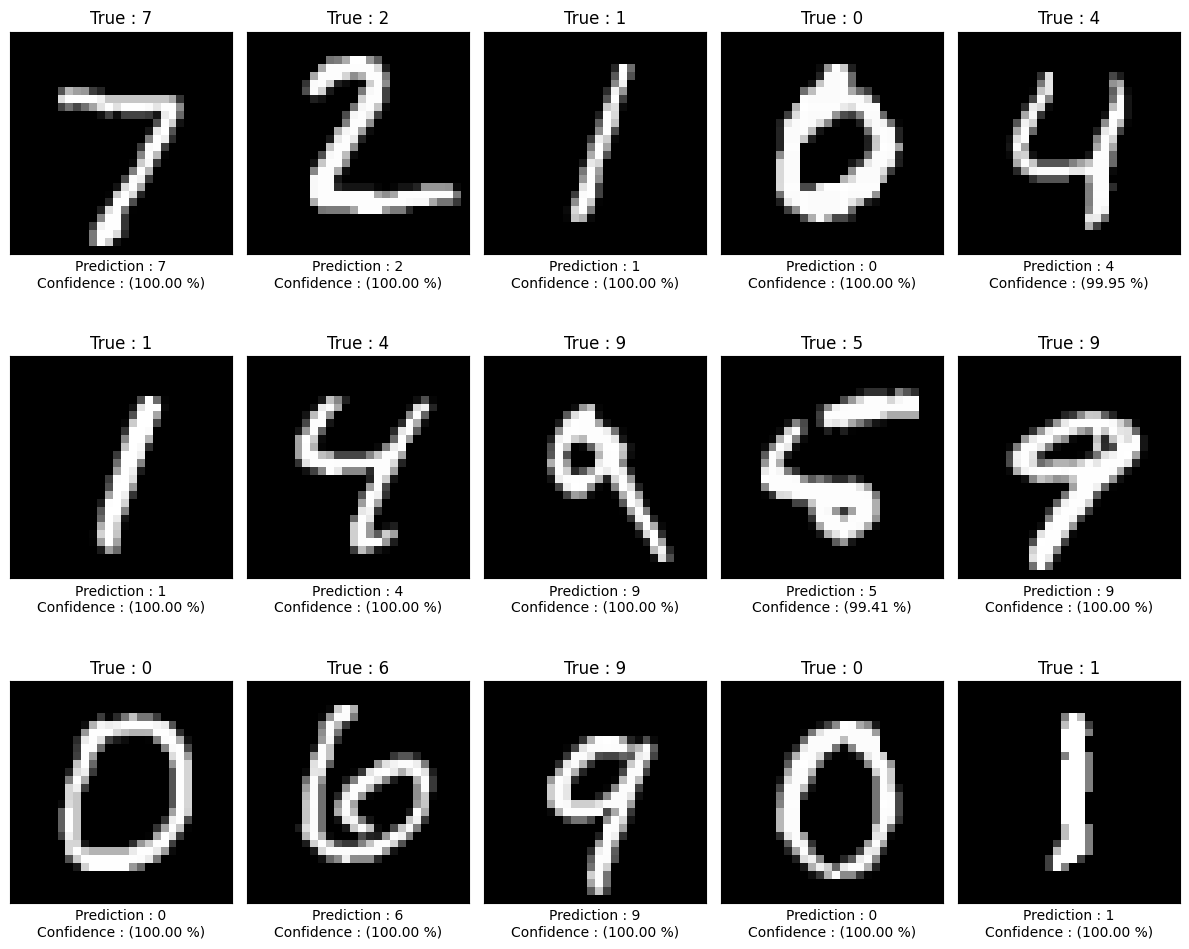

In [54]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}')
  ax.set_xlabel(f'Prediction : {y_pred}\nConfidence : ({confidence:.2f} %)')
plt.tight_layout()
plt.show()